In [1]:
# import and set alias for pandas
import pandas as pd

In [2]:
# read in purchase_data.csv file

data_file = "../../gt-virt-data-pt-12-2021-u-c/04-Pandas/Homework/HeroesOfPymoli/Resources/purchase_data.csv"

In [3]:
heroes_data = pd.read_csv(data_file)

In [4]:
heroes_data.columns

Index(['Purchase ID', 'SN', 'Age', 'Gender', 'Item ID', 'Item Name', 'Price'], dtype='object')

In [5]:
heroes_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


In [6]:
# count unique # of players and create dataframe to allow printing in specified format
unique_cnt = heroes_data["SN"].nunique()
unique_cnt_df = pd.DataFrame([unique_cnt])
unique_cnt_df = unique_cnt_df.rename(columns = {0: "Total Players"})
unique_cnt_df

,Total Players
0,576


In [7]:
# create purchasing analysis stats: # unique items, avg price, # purchases and total revenue
num_unique_items = heroes_data["Item Name"].nunique()
avg_price = heroes_data["Price"].mean()
num_purchases = heroes_data["Purchase ID"].count()
tot_rev = heroes_data["Price"].sum()

# create new df using purchasing stats
# use index option within dataframe function since passing scalar values
purchase_df = pd.DataFrame({"Number of Unique Items": num_unique_items, 
                            "Average Price": avg_price, 
                            "Number of Purchases": num_purchases, 
                            "Total Revenue": tot_rev}, index=[0])
purchase_df

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,179,3.050987,780,2379.77


In [8]:
# create a unique data set of customers
unique_cust = heroes_data.drop_duplicates(subset = "SN", inplace = False)
unique_cust

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44
...,...,...,...,...,...,...,...
773,773,Hala31,21,Male,19,"Pursuit, Cudgel of Necromancy",1.02
774,774,Jiskjask80,11,Male,92,Final Critic,4.19
775,775,Aethedru70,21,Female,60,Wolf,3.54
777,777,Yathecal72,20,Male,67,"Celeste, Incarnation of the Corrupted",3.46


In [66]:
# use unique_cust df to calculate disribution of gender
gender_df = pd.DataFrame(unique_cust["Gender"].value_counts())
gender_df["Percent"] = gender_df["Gender"]/gender_df["Gender"].sum()
gender_df = gender_df.rename(columns = {"Gender": "Total Count",
                                       "Percent": "Percentage of Players"})
gender_df



,Total Count,Percentage of Players
Male,484,0.840278
Female,81,0.140625
Other / Non-Disclosed,11,0.019097


In [67]:
# create df to allow purchase analysis at gender level
gender_price = heroes_data[["Gender", "Price"]]
gender_sn = heroes_data[["Gender", "SN"]]

In [95]:
# perform calculation for purchase count
pur_cnt = gender_sn.groupby(["Gender"]).count()
pur_cnt = pur_cnt.rename(columns = {"SN": "Purchase Count"})
pur_cnt = pur_cnt.reset_index()

# perform calculation for total purchase value
tot_pur_val = gender_price.groupby(["Gender"]).sum()
tot_pur_val = tot_pur_val.rename(columns = {"Price": "Total Purchase Value"})
tot_pur_val = tot_pur_val.reset_index()

# perform calculation for customer number
num_cust = gender_sn.groupby(["Gender"]).nunique()
num_cust = num_cust.rename(columns = {"SN": "Person Count"})
num_cust = num_cust.reset_index()

# merge 3 dfs using inner on gender
gender_pur_df = pd.merge(pd.merge(pur_cnt, tot_pur_val, how = "inner", on = "Gender"), num_cust, how = "inner", on = "Gender")
gender_pur_df.set_index("Gender", inplace = True)
gender_pur_df["Average Purchase Price"] = gender_pur_df["Total Purchase Value"]/gender_pur_df["Purchase Count"]
gender_pur_df["Average Total Purchase per Person"] = gender_pur_df["Total Purchase Value"]/gender_pur_df["Person Count"]
gender_pur_df = gender_pur_df[["Purchase Count", "Average Purchase Price", "Total Purchase Value", "Average Total Purchase per Person"]]
gender_pur_df

,Purchase Count,Average Purchase Price,Total Purchase Value,Average Total Purchase per Person
Gender,,,,
Female,113,3.203009,361.94,4.468395
Male,652,3.017853,1967.64,4.065372
Other / Non-Disclosed,15,3.346000,50.19,4.562727


In [96]:
# create bins
age_bin_summary = unique_cust[["Age", "SN"]]
bins = [0, 9, 14, 19, 24, 29, 34, 39, float("inf")]
age_bin_names = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]



In [97]:
age_bin_summary["Age Ranges"] = pd.cut(age_bin_summary["Age"], bins, labels = age_bin_names, include_lowest = True)
age_bin_summary.head()

<ipython-input-97-403dc888cfd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_bin_summary["Age Ranges"] = pd.cut(age_bin_summary["Age"], bins, labels = age_bin_names, include_lowest = True)


,Age,SN,Age Ranges
0,20,Lisim78,20-24
1,40,Lisovynya38,40+
2,24,Ithergue48,20-24
3,24,Chamassasya86,20-24
4,23,Iskosia90,20-24


In [98]:
# group by age range
grouped_age = age_bin_summary.groupby("Age Ranges")
grouped_age_df = pd.DataFrame(grouped_age["SN"].count())
grouped_age_df = grouped_age_df.rename(columns = {"SN": "Total Count"})
grouped_age_df["Percentage of Players"] = grouped_age_df["Total Count"]/grouped_age_df["Total Count"].sum()
grouped_age_df.columns
grouped_age_df

,Total Count,Percentage of Players
Age Ranges,,
<10,17,0.029514
10-14,22,0.038194
15-19,107,0.185764
20-24,258,0.447917
25-29,77,0.133681
30-34,52,0.090278
35-39,31,0.053819
40+,12,0.020833


In [99]:
# create bins for purchase
price_bin_summary = heroes_data[["Age", "Price", "SN"]]
bins = [0, 9, 14, 19, 24, 29, 34, 39, float("inf")]
price_bin_names = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]
price_bin_summary["Age Ranges"] = pd.cut(price_bin_summary["Age"], bins, labels = price_bin_names, include_lowest = True)
price_bin_summary

<ipython-input-99-9d1efa35345b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_bin_summary["Age Ranges"] = pd.cut(price_bin_summary["Age"], bins, labels = price_bin_names, include_lowest = True)


,Age,Price,SN,Age Ranges
0,20,3.53,Lisim78,20-24
1,40,1.56,Lisovynya38,40+
2,24,4.88,Ithergue48,20-24
3,24,3.27,Chamassasya86,20-24
4,23,1.44,Iskosia90,20-24
...,...,...,...,...
775,21,3.54,Aethedru70,20-24
776,21,1.63,Iral74,20-24
777,20,3.46,Yathecal72,20-24
778,7,4.19,Sisur91,<10


In [116]:
# create df to allow purchase analysis at age level
age_price = price_bin_summary[["Age Ranges", "Price"]]
age_sn = price_bin_summary[["Age Ranges", "SN"]]

In [124]:
# apply age bin and group by to calculate desired stats

# calculate purchase count
age_sn_grouped = age_sn.groupby(["Age Ranges"]).count()
age_sn_grouped = age_sn_grouped.rename(columns = {"SN": "Purchase Count"})
age_sn_grouped

# calculate purchase count
age_price_grouped = age_price.groupby(["Age Ranges"]).sum()
age_price_grouped = age_price_grouped.rename(columns = {"Price": "Total Purchase Value"})
#age_price_grouped

# calculate person count
age_usn_grouped = age_sn.groupby(["Age Ranges"]).nunique()
age_usn_grouped = age_usn_grouped.rename(columns = {"SN": "Person Count"})
#age_usn_grouped

# merge 3 dfs using inner on age range
age_pur_df = pd.merge(pd.merge(age_sn_grouped, age_price_grouped, how = "inner", on = "Age Ranges"), age_usn_grouped, how = "inner", on = "Age Ranges")
age_pur_df["Average Purchase Price"] = age_pur_df["Total Purchase Value"]/age_pur_df["Purchase Count"]
age_pur_df["Average Total Purchase per Person"] = age_pur_df["Total Purchase Value"]/age_pur_df["Person Count"]
age_pur_df = age_pur_df[["Purchase Count", "Average Purchase Price", "Total Purchase Value", "Average Total Purchase per Person"]]
age_pur_df

,Purchase Count,Average Purchase Price,Total Purchase Value,Average Total Purchase per Person
Age Ranges,,,,
<10,23,3.353478,77.13,4.537059
10-14,28,2.956429,82.78,3.762727
15-19,136,3.035956,412.89,3.858785
20-24,365,3.052219,1114.06,4.318062
25-29,101,2.900990,293.00,3.805195
30-34,73,2.931507,214.00,4.115385
35-39,41,3.601707,147.67,4.763548
40+,13,2.941538,38.24,3.186667


In [131]:
# top spender
# calculate purchase count by SN
spender_summary = heroes_data[["SN", "Price"]]
purchase_count = spender_summary.groupby(["SN"]).count()
purchase_count = purchase_count.rename(columns = {"Price": "Purchase Count"})

# totl purchase value
TotalPurchaseValue = spender_summary.groupby(["SN"]).sum()
TotalPurchaseValue = TotalPurchaseValue.rename(columns = {"Price": "Total Purchase Value"})

top_spender_df = pd.merge(purchase_count, TotalPurchaseValue, how = "inner", on = "SN")
top_spender_sorted = top_spender_df.sort_values("Total Purchase Value", ascending = False)
top_spender_sorted["Average Purchase Price"] = top_spender_sorted["Total Purchase Value"]/top_spender_sorted["Purchase Count"]
top_spender_sorted = top_spender_sorted[["Purchase Count", "Average Purchase Price", "Total Purchase Value"]]
top_spender_sorted.iloc[:5, :]

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,3.792000,18.96
Idastidru52,4,3.862500,15.45
Chamjask73,3,4.610000,13.83
Iral74,4,3.405000,13.62
Iskadarya95,3,4.366667,13.10


In [139]:
# most popular
popular_summary = heroes_data[["Item ID", "Item Name", "Price"]]
purchase_count = popular_summary.groupby(["Item ID", "Item Name"]).count()
purchase_count = purchase_count.rename(columns = {"Price": "Purchase Count"})

# totl purchase value
TotalPurchaseValue = popular_summary.groupby(["Item ID", "Item Name"]).sum()
TotalPurchaseValue = TotalPurchaseValue.rename(columns = {"Price": "Total Purchase Value"})

most_popular_df = pd.merge(purchase_count, TotalPurchaseValue, how = "inner", on = ["Item ID", "Item Name"])
most_popular_sorted = most_popular_df.sort_values("Purchase Count", ascending = False)
most_popular_sorted.iloc[:5, :]

,,Purchase Count,Total Purchase Value
Item ID,Item Name,,
92,Final Critic,13,59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,50.76
145,Fiery Glass Crusader,9,41.22
132,Persuasion,9,28.99
108,"Extraction, Quickblade Of Trembling Hands",9,31.77


In [104]:
# most profitable
purchase_sorted = top_popular.sort_values(('Price',     'sum'), ascending = False)
purchase_sorted

Price              
                                                sum count nunique
Item Name                                                        
Final Critic                                  59.99    13       2
Oathbreaker, Last Hope of the Breaking Storm  50.76    12       1
Nirvana                                       44.10     9       1
Fiery Glass Crusader                          41.22     9       1
Singed Scalpel                                34.80     8       1
...                                             ...   ...     ...
Flux, Destroyer of Due Diligence               2.12     2       1
Whistling Mithril Warblade                     2.00     2       1
Exiled Mithril Longsword                       2.00     1       1
Gladiator's Glaive                             1.93     1       1
The Decapitator                                1.75     1       1

[179 rows x 3 columns]

In [107]:
popular_sorted.columns

MultiIndex([('Price',     'sum'),
            ('Price',   'count'),
            ('Price', 'nunique')],
           )

In [108]:
heroes_data.dtypes

Purchase ID      int64
SN              object
Age              int64
Gender          object
Item ID          int64
Item Name       object
Price          float64
dtype: object

In [109]:
import matplotlib.pyplot as plt
plt.close("all")

In [110]:
plt.figure()

<Figure size 640x480 with 0 Axes>

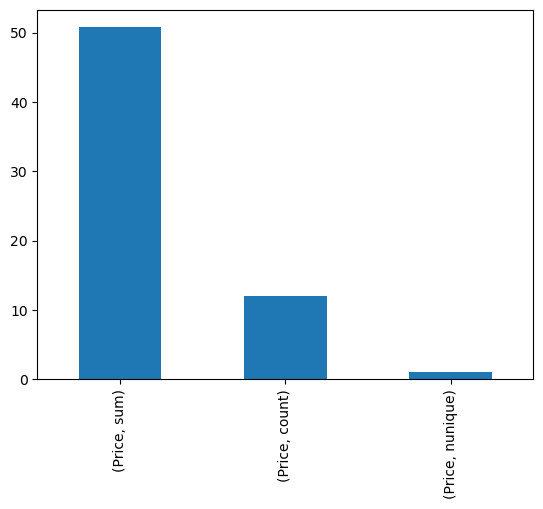

In [111]:
purchase_sorted.iloc[1].plot.bar()
plt.show()

In [112]:
students = [('Ankit', 22, 'A'),
           ('Swapnil', 22, 'B'),
           ('Priya', 22, 'B'),
           ('Shivangi', 22, 'B'),
            ]
 
# Create a DataFrame object
stu_df = pd.DataFrame(students, columns =['Name', 'Age', 'Section'],
                      index =['1', '2', '3', '4'])
 
# gives a tuple of column name and series
# for each column in the dataframe
for (columnName, columnData) in stu_df.iteritems():
    print('Column Name : ', columnName)
    print('Column Contents : ', columnData.values)


Column Name :  Name
Column Contents :  ['Ankit' 'Swapnil' 'Priya' 'Shivangi']
Column Name :  Age
Column Contents :  [22 22 22 22]
Column Name :  Section
Column Contents :  ['A' 'B' 'B' 'B']
